In [ ]:
# The following code is written to display the overflowing output in wrapped
# out manner. All long-line outputs will be wrapped to the next line and we
# won't need to scroll left-right to see the output.

from IPython.display import HTML, display

def set_css():
  display(HTML('''
  <style>
    pre {
        white-space: pre-wrap;
    }
  </style>
  '''))
get_ipython().events.register('pre_run_cell', set_css)

# **Converting Text to Numbers with scikit-learn**

Text data requires special preparation before you can start using it for predictive modeling.

* The text must be parsed to get words, called **tokenization**.

* Then the words need to be encoded as integers or floating point values for use as input to a machine learning algorithm, called **feature extraction (or vectorization)**.





* We cannot work with text directly when using machine learning algorithms.

* Algorithms take vectors of numbers as input, therefore we need to convert documents to fixed-length vectors of numbers.

* A simple and effective model for thinking about text documents in machine learning is called the **Bag-of-Words Model**, or BoW.

The `scikit-learn` library offers easy-to-use tools to perform both tokenization and feature extraction of your text data.

In this tutorial, we will discover:
* How to convert text to word count vectors with **CountVectorizer**.

* How to convert text to word frequency vectors with **TfidfVectorizer**.
* How to convert text to unique integers with **HashingVectorizer**.

## **One-hot vectors**

**A vocabulary lists all the unique tokens (words) that are present in the text.**

We can create a numerical vector representation for **each word**.

These vectors are called **one-hot vectors**.

A **sequence** of one-hot vectors fully captures the original document text in a sequence of vectors, a table of numbers.

That will solve the first problem of NLP, _**turning words into numbers**_:

In [ ]:
import numpy as np

sentence = "Thomas Jefferson began building Monticello at the age of 26."

# str.split() is our quick-and-dirty tokenizer
token_sequence = str.split(sentence)

# Sorted lexicographically (lexically) so numbers come before letters, and capital letters come before lowercase letters.
vocab = sorted(set(token_sequence))

', '.join(vocab)

'26., Jefferson, Monticello, Thomas, age, at, began, building, of, the'

In [ ]:
num_tokens = len(token_sequence)
vocab_size = len(vocab)

# The empty table is as wide as our count of unique vocabulary terms and as high as the length of our document, 10 rows by 10 columns.
onehot_vectors = np.zeros((num_tokens, vocab_size), int)

# For each word in the sentence, mark the column for that word in our vocabulary with a 1.
for i, word in enumerate(token_sequence):
  onehot_vectors[i, vocab.index(word)] = 1

' '.join(vocab)

'26. Jefferson Monticello Thomas age at began building of the'

In [ ]:
onehot_vectors

array([[0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

[0, 0, 0, 1, 0, 0, 0, 0, 0, 0], [0, 1, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 1, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 1, 0, 0], [0, 0, 1, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 1], [0, 0, 0, 0, 1, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 1, 0], [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]]

A DataFrame keeps track of labels for each column, allowing us to label each column in our table with the token or word it represents.

In [ ]:
import pandas as pd
pd.DataFrame(onehot_vectors, columns=vocab)

,26.,Jefferson,Monticello,Thomas,age,at,began,building,of,the
0,0,0,0,1,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,0,0,1,0,0
4,0,0,1,0,0,0,0,0,0,0
5,0,0,0,0,0,1,0,0,0,0
6,0,0,0,0,0,0,0,0,0,1
7,0,0,0,0,1,0,0,0,0,0
8,0,0,0,0,0,0,0,0,1,0
9,1,0,0,0,0,0,0,0,0,0


One nice feature of this vector representation of words and tabular representation of documents is that no information is lost. As long as you keep track of which words are indicated by which column, you can reconstruct the original document from this table of one-hot vectors.

They’re a good choice for any model or NLP pipeline that needs to retain all the
meaning inherent in the original text.

In most cases, the vocabulary of tokens you’ll use in an NLP pipeline will be millions of tokens.

Let’s assume you have a million tokens in our NLP pipeline vocabulary. And let’s say you have a meager 3,000 books with 3,500 sentences each and 15 words per sentence:

In [ ]:
# Number of rows in the table
num_rows = 3000 * 3500 * 15
num_rows

157500000

In [ ]:
# Number of bytes, if you use only one byte for each cell in our table
num_bytes = num_rows * 1000000
num_bytes

157500000000000

In [ ]:
num_bytes/1e9 # Gigabytes

157500.0

In [ ]:
# In a python interactive console, the variable name "_" is
# automatically assigned the value of the previous output. This is handy
# if you forget to explicitly assign the output of a function or expression
# to a variable name like you did for num_bytes and num_rows.

_ / 1000  # Terabytes


157.5

## **Bag-of-words**

Storing all those zeros, and trying to remember the order of the words in all our documents, doesn’t make much sense.

What we want to do is compress the meaning of a document down to its essence.

We’d like to compress the document down to a single vector rather than a big table.

Let’s assume you can ignore the order and grammar of the words, and jumble them all up together into a “bag,” one bag for each sentence or short document.

A **bag-of-words** vector is useful for summarizing the essence of a document. Even after we sorted all the words lexically, a human can still guess what the sentence was about and so can a machine. You can use this new bag-of-words vector approach to compress the information content for each document into a data structure that’s easier to work with.

If we summed all the one-hot vectors together we’d get a **bag-of-words** vector.

This is also called a **word frequency vector**, because it only counts the frequency of words, not their order.

You could use this single vector to represent the whole document or sentence in a single, reasonable length vector. It would only be as long as our vocabulary size (the number of unique tokens you want to keep track of).


We can also put the tokens into a binary vector indicating the presence or absence of a particular word in a particular sentence.

This vector representation of a set of sentences could be “indexed” to indicate which words were used in which document.

This index is equivalent to the index you find at the end of many textbooks, except that instead of keeping track of which page a word occurs on, you can keep
track of the sentence (or the associated vector) where it occurred.

In [ ]:
sentence_bow = {}
for token in sentence.split():
  sentence_bow[token] = 1

sorted(sentence_bow.items())

[('26.', 1),
 ('Jefferson', 1),
 ('Monticello', 1),
 ('Thomas', 1),
 ('age', 1),
 ('at', 1),
 ('began', 1),
 ('building', 1),
 ('of', 1),
 ('the', 1)]

As per the ordering of characters in the ASCII and Unicode character sets, Python’s sorted() puts decimal numbers before characters, and capitalized words before lowercase words.

Using a dict (or any paired mapping of words to their 0/1 values) to store a binary vector shouldn’t waste much space.
Using a dictionary to represent our vector ensures that it only has to store a 1 when any one of the possible words in our dictionary appear in a particular document.

Because a dictionary “ignores” the absent words, the words labeled with a 0, the dictionary representation only requires a few bytes for each word in our 10-word sentence.
And this dictionary could be made even more efficient if you represented each
word as an integer pointer to each word’s location within our lexicon—the list of
words that makes up our vocabulary for a particular application.

Let’s use an even more efficient form of a dictionary, a Pandas Series.

We’ll wrap that up in a Pandas DataFrame so we can add more sentences to our
binary vector “corpus” of texts about Thomas Jefferson.

In [ ]:
import pandas as pd

df = pd.DataFrame(pd.Series(dict([(token, 1) for token in sentence.split()])), columns=['sent']).T

df

,Thomas,Jefferson,began,building,Monticello,at,the,age,of,26.
sent,1,1,1,1,1,1,1,1,1,1


Let’s add a few more texts to your corpus to see how a DataFrame stacks up.

In [ ]:
sentences = """Thomas Jefferson began building Monticello at the age of 26.\n"""
sentences += """Construction was done mostly by local masons and carpenters.\n"""
sentences += "He moved into the South Pavilion in 1770.\n"
sentences += """Turning Monticello into a neoclassical masterpiece was Jefferson's obsession."""

corpus = {}
for i, sent in enumerate(sentences.split('\n')):
  corpus['sent{}'.format(i)] = dict((tok, 1) for tok in sent.split())

df = pd.DataFrame.from_records(corpus).fillna(0).astype(int).T
df[df.columns[:10]]

,Thomas,Jefferson,began,building,Monticello,at,the,age,of,26.
sent0,1,1,1,1,1,1,1,1,1,1
sent1,0,0,0,0,0,0,0,0,0,0
sent2,0,0,0,0,0,0,1,0,0,0
sent3,0,0,0,0,1,0,0,0,0,0


With a quick scan, you can see little overlap in word usage for these sentences. Among the first seven words in your vocabulary, only the word “Monticello” appears in more than one sentence.

Now you need to be able to compute this overlap within your pipeline whenever you want to compare documents or search for similar documents.

One way to check for the similarities between sentences is to count the number of overlapping tokens using a dot product.

## **n-grams**

An **n-gram** is a sequence containing up to n elements that have been extracted from a sequence of those elements, usually a string.
> *The “elements” of an n-gram can be characters, syllables, words, or even symbols like “A,” “T,” “G,” and “C” used to represent a DNA sequence*

**Why bother with n-grams?**

> *n-grams retain a context of a word when we tie it to its neighbor(s) in the NLP pipeline*

When a sequence of tokens is vectorized into a bag-of-words vector, it loses a lot of the meaning inherent in the order of those words. By extending the concept of a token to include multiword tokens, n-grams, the NLP pipeline can retain much of the meaning inherent in the order of words in the statement.

For example, the meaning-inverting word “not” will remain attached to its neighboring words, where it belongs. Without n-gram tokenization, it would be free floating. Its meaning would be associated with the entire sentence or document rather than its neighboring words. The 2-gram “was not” retains much more of the meaning of the individual words “not” and “was” than those 1-grams alone in a bag-of-words vector.

In [ ]:
# tokenize_2grams("Thomas Jefferson began building Monticello at the age of 26.")
import re


sentence = """Thomas Jefferson began building Monticello at the age of 26."""
pattern = re.compile(r"([-\s.,;!?])+")
tokens = pattern.split(sentence)
tokens = [x for x in tokens if x and x not in '- \t\n.,;!?']
tokens

['Thomas',
 'Jefferson',
 'began',
 'building',
 'Monticello',
 'at',
 'the',
 'age',
 'of',
 '26']

In [ ]:
from nltk.util import ngrams
list(ngrams(tokens, 2))

[('Thomas', 'Jefferson'),
 ('Jefferson', 'began'),
 ('began', 'building'),
 ('building', 'Monticello'),
 ('Monticello', 'at'),
 ('at', 'the'),
 ('the', 'age'),
 ('age', 'of'),
 ('of', '26')]

In [ ]:

list(ngrams(tokens, 3))

[('Thomas', 'Jefferson', 'began'),
 ('Jefferson', 'began', 'building'),
 ('began', 'building', 'Monticello'),
 ('building', 'Monticello', 'at'),
 ('Monticello', 'at', 'the'),
 ('at', 'the', 'age'),
 ('the', 'age', 'of'),
 ('age', 'of', '26')]

In [ ]:
list(ngrams(tokens, 4))

[('Thomas', 'Jefferson', 'began', 'building'),
 ('Jefferson', 'began', 'building', 'Monticello'),
 ('began', 'building', 'Monticello', 'at'),
 ('building', 'Monticello', 'at', 'the'),
 ('Monticello', 'at', 'the', 'age'),
 ('at', 'the', 'age', 'of'),
 ('the', 'age', 'of', '26')]

# **Bag of N-Grams**

One hot encoding, BoW and TF-IDF treat words as independent units.

There is no notion of phrases or word ordering. Bag of Ngrams (BoN) approach tries to remedy this.

It does so by breaking text into chunks of n countigous words/tokens. This can help us capture some context, which earlier approaches could not do.

Let us see how it works using the same toy corpus we used in earlier examples.

**`CountVectorizer`**, which we used for BoW, can be used for getting a Bag of N-grams representation as well, using its ngram_range argument.

The code snippet below shows how:

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

documents = ["Dog bites man.", "Man bites dog.", "Dog eats meat.", "Man eats food."]
processed_docs = [doc.lower().replace(".","") for doc in documents]

#Ngram vectorization example with count vectorizer and uni, bi, trigrams
count_vect = CountVectorizer(ngram_range=(1,3))

#Build a BOW representation for the corpus
bow_rep = count_vect.fit_transform(processed_docs)

#Look at the vocabulary mapping
print("Our vocabulary: ", count_vect.vocabulary_)

#see the BOW rep for first 2 documents
print("BoW representation for 'dog bites man': ", bow_rep[0].toarray())
print("BoW representation for 'man bites dog: ",bow_rep[1].toarray())
# print("BoW representation for 'Dog and men both eat meat",bow_rep[4].toarray())

#Get the representation using this vocabulary, for a new text
temp = count_vect.transform(["dog and dog are friends"])

print("Bow representation for 'dog and dog are friends':", temp.toarray())

Our vocabulary:  {'dog': 3, 'bites': 0, 'man': 12, 'dog bites': 4, 'bites man': 2, 'dog bites man': 5, 'man bites': 13, 'bites dog': 1, 'man bites dog': 14, 'eats': 8, 'meat': 17, 'dog eats': 6, 'eats meat': 10, 'dog eats meat': 7, 'food': 11, 'man eats': 15, 'eats food': 9, 'man eats food': 16}
BoW representation for 'dog bites man':  [[1 0 1 1 1 1 0 0 0 0 0 0 1 0 0 0 0 0]]
BoW representation for 'man bites dog:  [[1 1 0 1 0 0 0 0 0 0 0 0 1 1 1 0 0 0]]
Bow representation for 'dog and dog are friends': [[0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0]]


Note that the number of features (and hence the size of the feature vector) increased a lot for the same data, compared to the ther single word based representations!!

## **Word Counts with CountVectorizer**

The `CountVectorizer` provides a simple way to both tokenize a collection of text documents and build a vocabulary of known words

It also encodes new documents using that vocabulary.

It can be used as follows:
* Create an instance of the `CountVectorizer` class.
* Call the `fit()` function in order to learn a vocabulary from one or more documents.
* Call the `transform()` function on one or more documents as needed to encode each as a vector.

* An <font color="blue">encoded vector</font> is returned with a <font color="blue">length of the entire vocabulary</font> and <font color="blue">an integer count</font> for the number of times each word appeared in the document.

> * However these vectors are sparse vectors. Python provides an efficient way of handling sparse vectors in the `scipy.sparse` package.
> * The vectors returned from a call to `transform()` will be sparse vectors, and you can transform them back to `NumPy` arrays to look and better understand what is going on by calling the `toarray()` function.



In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

# list of text documents
text = ["The quick brown fox jumped over the lazy dog."]

# create the transform
vectorizer = CountVectorizer()

# tokenize and build vocab
vectorizer.fit(text)

# summarize
print(vectorizer.vocabulary_)

# encode document
vector = vectorizer.transform(text)

# summarize encoded vector
print("Vector shape: ", vector.shape)
print("Vector type: ", type(vector))
print(vector.toarray())

{'the': 7, 'quick': 6, 'brown': 0, 'fox': 2, 'jumped': 3, 'over': 5, 'lazy': 4, 'dog': 1}
Vector shape:  (1, 8)
Vector type:  <class 'scipy.sparse._csr.csr_matrix'>
[[1 1 1 1 1 1 1 2]]


* We can access the vocabulary to see what exactly was tokenized by calling:

>> `print(vectorizer.vocabulary_)`

* Running the example first prints the vocabulary, then the shape of the encoded document.

* We can see that there are 8 words in the vocab, and therefore encoded vectors have a length of 8.

* We can then see that the encoded vector is a sparse matrix.

* Finally, we can see an array version of the encoded vector showing a count of 1 occurrence for each word except the (index and id 7) that has an occurrence of 2.

We can see that all words were made lowercase by default and that the punctuation was ignored.

These and other aspects of tokenizing can be configured through other options in the API documentation.



Importantly, the same vectorizer can be used on documents that contain words not included in the vocabulary.

These words are ignored and no count is given in the resulting vector.

For example, below is an example of using the vectorizer above to encode a document with one word in the vocab and one word that is not.

In [ ]:
# encode another document
text2 = ["the puppy"]
vector = vectorizer.transform(text2)
print(vector.toarray())

[[0 0 0 0 0 0 0 1]]


Running this example prints the array version of the encoded sparse vector showing one occurrence of the one word in the vocab and the other word not in the vocab completely ignored.

> `[[0 0 0 0 0 0 0 1]]`

The encoded vectors can then be used directly with a machine learning algorithm.

## **Word Frequencies with TfidfVectorizer**

One hot vector Word counts are very basic.

One issue with simple counts is that some words like `the` will appear many times and their large counts will not be very meaningful in the encoded vectors.

* An alternative is to calculate word frequencies, and the most popular method is called **<font color='blue'>`TF-IDF: Term Frequency - Inverse
Document Frequency`</font>** which are the components of the resulting scores assigned to each word.

* **Term Frequency**: This summarizes how often a given word appears within a document.
* **Inverse Document Frequency**: This downscales words that appear a lot across documents.

**TF-IDF** are word frequency scores that try to highlight words that are more interesting, e.g. frequent in a document but not across documents.

for a given term, $t$, in a given document, $d$, in a corpus, $D$, you get:
$$
  \text{tf}(t, d) = \frac{count(t)}{count(d)}
$$

$$
  \text{idf}(t, D) = \log \left[\frac{\text{number of documents}}{\text{number of documents containing t}}\right]
$$

$$
  \text{tf-idf}(t, d, D) = \text{tf}(t, d) * \text{idf}(t, D)
$$

The more times a word appears in the document, the TF (and hence the TF-IDF) will go up.

At the same time, as the number of documents that contain that word goes
up, the IDF (and hence the TF-IDF) for that word will go down.

The `TfidfVectorizer` will tokenize documents, learn the vocabulary and inverse document frequency weightings, and allow you to encode new documents.

Alternately, if you already have a learned `CountVectorizer`, you can use it with a `TfidfTransformer` to just calculate the inverse document frequencies and start encoding documents.

The same `create`, `fit`, and `transform` process is used as with the `CountVectorizer`.

Below is an example of using the `TfidfVectorizer` to learn vocabulary and inverse document frequencies across 3 small documents and then encode one of those documents.

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# list of text documents
text = ["The quick brown fox jumped over the lazy dog.",
		"The dog.",
		"The fox"]

# create the transform
vectorizer = TfidfVectorizer()

# tokenize and build vocab
vectorizer.fit(text)

# # summarize the attributes of vectorizer
print(vectorizer.get_feature_names_out())
print(vectorizer.vocabulary_)
print(vectorizer.idf_)

# # encode document
vector = vectorizer.transform([text[0]])

# # summarize encoded vector
print("Shape: ", vector.shape)
print("Array: ", vector.toarray())

['brown' 'dog' 'fox' 'jumped' 'lazy' 'over' 'quick' 'the']
{'the': 7, 'quick': 6, 'brown': 0, 'fox': 2, 'jumped': 3, 'over': 5, 'lazy': 4, 'dog': 1}
[1.69314718 1.28768207 1.28768207 1.69314718 1.69314718 1.69314718
 1.69314718 1.        ]
Shape:  (1, 8)
Array:  [[0.36388646 0.27674503 0.27674503 0.36388646 0.36388646 0.36388646
  0.36388646 0.42983441]]


The way scikit-learn calculates TF-IDF values is different from that defined in literature.

For more information about how scikit-learn calculates TF-IDF, please see the [documentation](https://scikit-learn.org/stable/modules/feature_extraction.html#tfidf-term-weighting)

* A vocabulary of 8 words is learned from the documents and each word is assigned a unique integer index in the output vector.

* The inverse document frequencies are calculated for each word in the vocabulary, assigning the lowest score of 1.0 to the most frequently observed word: the at index 7.

* Finally, the first document is encoded as an 8-element sparse array and we can review the final scorings of each word with different values for the, fox, and dog from the other words in the vocabulary.

The scores are normalized to values between 0 and 1 and the encoded document vectors can
then be used directly with most machine learning algorithms.

## **Hashing with HashingVectorizer**

Counts and frequencies can be very useful, but one limitation of these methods is that the vocabulary can become very large requiring large vectors for encoding documents and impose large requirements on memory.

A clever work around is to use a one way hash of words to convert them to integers. The clever part is that no vocabulary is required and you can choose an arbitrary-long fixed length vector.
  > A downside is that the hash is a one-way function so there is no way to convert the encoding back to a word (which may not matter for many supervised learning tasks).

The `HashingVectorizer` class implements this approach that can be used to consistently hash words, then tokenize and encode documents as needed.

* The example below demonstrates the `HashingVectorizer` for encoding a single document.
* An arbitrary fixed-length vector size of 20 was chosen. This corresponds to the range of the hash function, where small values (like 20) may result in hash collisions.

* Note that this vectorizer does not require a call to fit on the training data documents. Instead, after instantiation, it can be used directly to start encoding documents

In [ ]:
from sklearn.feature_extraction.text import HashingVectorizer

# list of text documents
text = ["The quick brown fox jumped over the lazy dog."]

# create the transform
vectorizer = HashingVectorizer(n_features=20)

# encode document
vector = vectorizer.transform(text)

# summarize encoded vector
print(vector.shape)
print(vector.toarray())

(1, 20)
[[ 0.          0.          0.          0.          0.          0.33333333
   0.         -0.33333333  0.33333333  0.          0.          0.33333333
   0.          0.          0.         -0.33333333  0.          0.
  -0.66666667  0.        ]]


Running the example encodes the sample document as a 20-element sparse array.

The values of the encoded document correspond to normalized word counts by default in the range of -1 to 1, but could be made simple integer counts by changing the default configuration.

# **Prepare data with Keras**

## **Split Words with text to word sequence**

Keras provides the text to word sequence() function that you can use to split text into a list of words.

By default, this function automatically does 3 things:
* Splits words by space.

* Filters out punctuation.
* Converts text to lowercase (lower=True).

In [ ]:
from keras.preprocessing.text import text_to_word_sequence

# define the document
text = 'The quick brown fox jumped over the lazy dog.'

# tokenize the document
result = text_to_word_sequence(text)
print(result)

['the', 'quick', 'brown', 'fox', 'jumped', 'over', 'the', 'lazy', 'dog']


This is a good first step, but further pre-processing is required before you can work with the text.

## **Encoding with one hot**



Keras provides the `one_hot()` function to tokenize and integer encode a text document in one step.

The function is a wrapper for the `hashing_trick()` function.

The function returns an integer encoded version of the document.

The use of a hash function means that there may be collisions and not all words will be assigned unique integer values.

As with the `text_to_word_sequence()` function in the previous section, the `one_hot()` function will make the text lower case, filter out punctuation, and split words based on white space.

In addition to the text, the vocabulary size (total words) must be specified.

This could be the total number of words in the document or more if you intend to encode additional documents that contains additional words.

The size of the vocabulary defines the hashing space from which
words are hashed.

By default, the hash function is used, although as we will see in the next section, alternate hash functions can be specified when calling the `hashing_trick()` function directly.

In [ ]:
from keras.preprocessing.text import text_to_word_sequence
# define the document
text = 'The quick brown fox jumped over the lazy dog.'
# estimate the size of the vocabulary
words = set(text_to_word_sequence(text))
vocab_size = len(words)
print(vocab_size)

8


We put this together with the `one_hot()` function and encode the words in the document.

The complete example is listed below.

The vocabulary size is increased by one-third to minimize collisions when hashing words.

In [ ]:
from keras.preprocessing.text import one_hot
from keras.preprocessing.text import text_to_word_sequence
# define the document
text = 'The quick brown fox jumped over the lazy dog.'
# estimate the size of the vocabulary
words = set(text_to_word_sequence(text))
vocab_size = len(words)
print(vocab_size)
# integer encode the document
result = one_hot(text, round(vocab_size*1.3))
print(result)

8
[4, 6, 8, 3, 3, 2, 4, 8, 7]



**Note:** Given the stochastic nature of neural networks, your specific results may vary.

Consider running the example a few times

## **Hash Encoding with hashing trick**

Keras provides the `hashing_trick()` function that tokenizes and then integer encodes the document, just like the `one_hot()` function.

It provides more flexibility, allowing you to specify the hash function as either `hash` (the default) or other hash functions such as the built in `md5` function or your own function.

Below is an example of integer encoding a document using the `md5` hash function.

In [ ]:
from keras.preprocessing.text import hashing_trick
from keras.preprocessing.text import text_to_word_sequence
# define the document
text = 'The quick brown fox jumped over the lazy dog.'
# estimate the size of the vocabulary
words = set(text_to_word_sequence(text))
vocab_size = len(words)
print(vocab_size)

# integer encode the document
result = hashing_trick(text, round(vocab_size*1.3), hash_function='md5')
print(result)

8
[6, 4, 1, 2, 7, 5, 6, 2, 6]


## **Tokenizer API**

Keras provides
the Tokenizer class for preparing text documents for deep learning. The Tokenizer must be
constructed and then fit on either raw text documents or integer encoded text documents. For
example:

In [ ]:
from keras.preprocessing.text import Tokenizer
# define 5 documents
docs = ['Well done!',
		'Good work',
		'Great effort',
		'nice work',
		'Excellent!']

# create the tokenizer
t = Tokenizer()
# fit the tokenizer on the documents
t.fit_on_texts(docs)
# summarize what was learned
print(t.word_counts)
print(t.document_count)
print(t.word_index)
print(t.word_docs)
# integer encode documents
encoded_docs = t.texts_to_matrix(docs, mode='count')
print(encoded_docs)

OrderedDict([('well', 1), ('done', 1), ('good', 1), ('work', 2), ('great', 1), ('effort', 1), ('nice', 1), ('excellent', 1)])
5
{'work': 1, 'well': 2, 'done': 3, 'good': 4, 'great': 5, 'effort': 6, 'nice': 7, 'excellent': 8}
defaultdict(<class 'int'>, {'done': 1, 'well': 1, 'good': 1, 'work': 2, 'effort': 1, 'great': 1, 'nice': 1, 'excellent': 1})
[[0. 0. 1. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 1. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1.]]


Once fit, the Tokenizer provides 4 attributes that can be used to query what has been learned about your documents:
* **word counts**: A dictionary mapping of words and their occurrence counts when the Tokenizer was fit.
* **word docs**: A dictionary mapping of words and the number of documents that reach appears in.
* **word index**: A dictionary of words and their uniquely assigned integers
* **document count**: A dictionary mapping and the number of documents they appear in calculated during the fit.

For example:

In [ ]:
# summarize what was learned
print(t.word_counts)
print(t.document_count)
print(t.word_index)
print(t.word_docs)

OrderedDict([('well', 1), ('done', 1), ('good', 1), ('work', 2), ('great', 1), ('effort', 1), ('nice', 1), ('excellent', 1)])
5
{'work': 1, 'well': 2, 'done': 3, 'good': 4, 'great': 5, 'effort': 6, 'nice': 7, 'excellent': 8}
defaultdict(<class 'int'>, {'done': 1, 'well': 1, 'good': 1, 'work': 2, 'effort': 1, 'great': 1, 'nice': 1, 'excellent': 1})


Once the Tokenizer has been fit on training data, it can be used to encode documents in the train or test datasets.

The `texts_to_matrix()` function on the `Tokenizer` can be used to create one vector per document provided per input.

The length of the vectors is the total size of the vocabulary.

This function provides a suite of standard bag-of-words model text encoding
schemes that can be provided via a mode argument to the function. The modes available include:
* **binary**: Whether or not each word is present in the document. This is the default.
* **count**: The count of each word in the document.
* **tfidf**: The Text Frequency-Inverse DocumentFrequency (TF-IDF) scoring for each word in the document.
* **freq**: The frequency of each word as a ratio of words within each document.

We can put all of this together with a worked example

In [ ]:
from keras.preprocessing.text import Tokenizer

# define 5 documents
docs = ['Well done!',
'Good work',
'Great effort',
'nice work',
'Excellent!']

# create the tokenizer
t = Tokenizer()

# fit the tokenizer on the documents
t.fit_on_texts(docs)

# summarize what was learned
print(t.word_counts)
print(t.document_count)
print(t.word_index)
print(t.word_docs)

# integer encode documents
encoded_docs = t.texts_to_matrix(docs, mode='count')
print(encoded_docs)

Running the example fits the Tokenizer with 5 small documents.

* The details of the fit Tokenizer are printed.
* Then the 5 documents are encoded using a word count.
* Each document is encoded as a 9-element vector with one position for each word and the chosen encoding scheme value for each word position.
* In this case, a simple word count mode is used.

# **Part-of-speech POS tagging**

The types of words defined by the different functions the words might fulfill are called parts of speech, and we distinguish between a number of such types:
* **Nouns—Words** that denote objects, animals, people, places, and concepts
* **Verbs—Words** that denote states, actions, and occurrences
* **Adjectives—Words** that denote qualities of objects, animals, people, places, and concepts
* **Adverbs** —Those for qualities of actions, states, and occurrences

This is not a comprehensive account of all parts of speech in English, but it should give some idea.

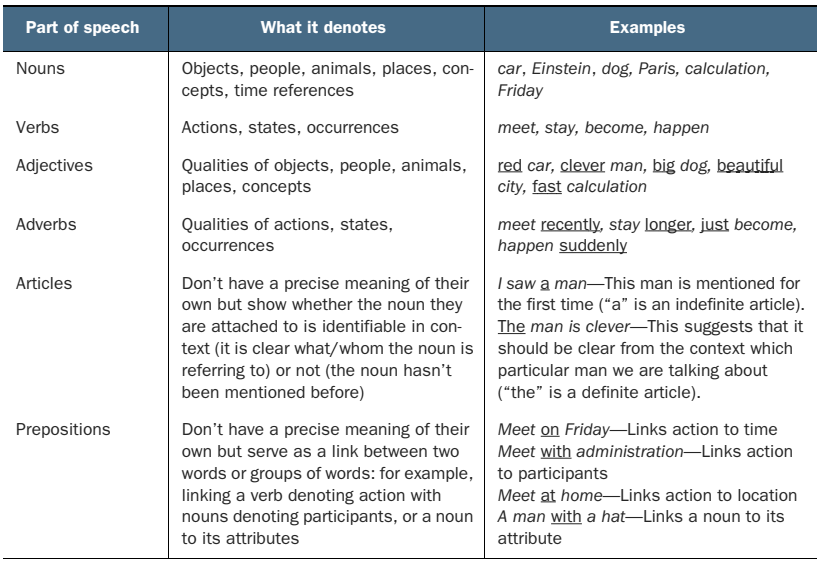

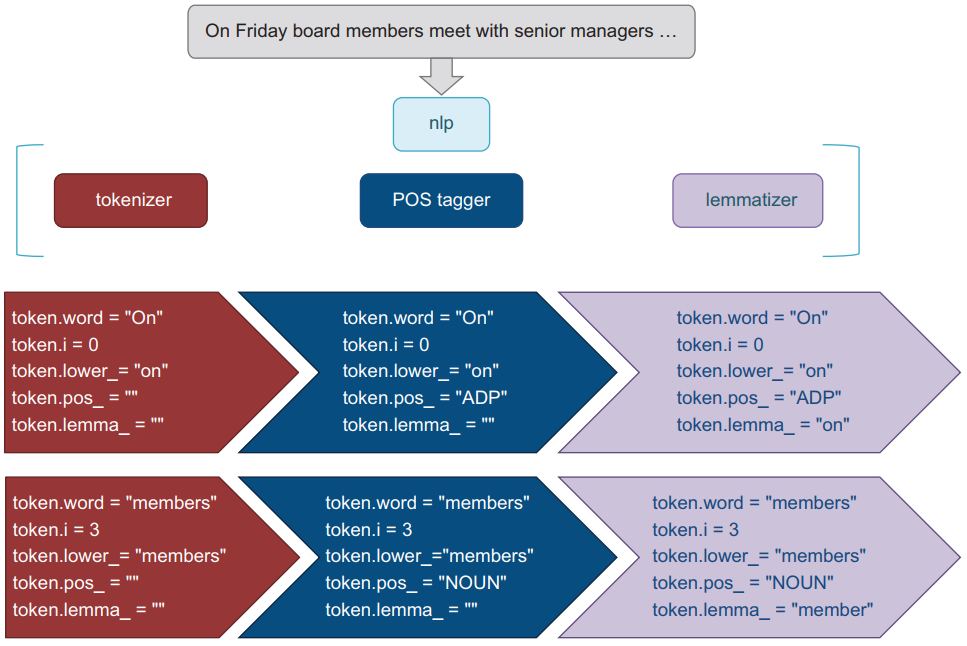

Mental model visualizing the flow of information between different
NLP components

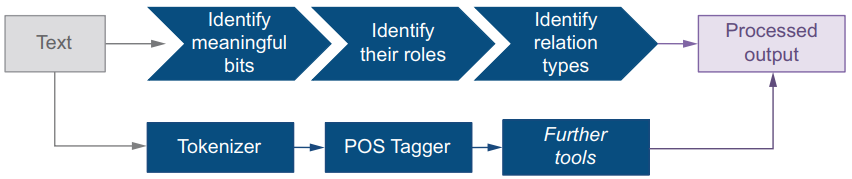

Following section will use `spaCy`, another very useful NLP library that you can put under your belt.

There are several reasons to look into spaCy:
1. `NLTK` and `spaCy` have their complementary strengths, so it's good to know how to use both.
2. `spaCy` is an actively supported and fast-developing library
3. There is a large community of people working with this library, so you can find code examples for various applications implemented with or for spaCy
4. `spaCy` is actively used in industry
5. It includes a powerful set of tools particularly applicable to large-scale information extraction


Running nlp pipeline on some input text:

In [ ]:
# Start by importing spaCy
import spacy

# The spacy.load command initializes the nlp pipeline.
nlp = spacy.load("en_core_web_sm")

# Provide the nlp pipeline with input text.
doc = nlp("On Friday board members meet with senior managers " +
          "to discuss future development of the company.")

# Print the output in a tabular format and add a header to the printout for clarity.
rows = []
rows.append(["Word", "Position", "Lowercase", "Lemma", "POS", "Alphanumeric", "Stopword"])
for token in doc:
    rows.append([token.text, str(token.i), token.lower_, token.lemma_,
                 token.pos_, str(token.is_alpha), str(token.is_stop)])

# Python’s zip function allows you to reformat input from row-wise
# representation to column-wise
columns = zip(*rows)

# Calculate the maximum length of strings in each column to allow
# enough space in the printout.
column_widths = [max(len(item) for item in col) for col in columns]

# Use the format functionality to adjust the width of each column in each row
# while printing out the results.
for row in rows:
    print(''.join(' {:{width}} '.format(row[i], width=column_widths[i])
                  for i in range(0, len(row))))

 Word         Position  Lowercase    Lemma        POS    Alphanumeric  Stopword 
 On           0         on           on           ADP    True          True     
 Friday       1         friday       Friday       PROPN  True          False    
 board        2         board        board        NOUN   True          False    
 members      3         members      member       NOUN   True          False    
 meet         4         meet         meet         VERB   True          False    
 with         5         with         with         ADP    True          True     
 senior       6         senior       senior       ADJ    True          False    
 managers     7         managers     manager      NOUN   True          False    
 to           8         to           to           PART   True          True     
 discuss      9         discuss      discuss      VERB   True          False    
 future       10        future       future       ADJ    True          False    
 development  11        deve

This output tells us:

1. The first item in each line is the original word from text.
  * It is returned by `token.text`.

2. The second is the position in text, which starts as all other indexing in Python from 0.
  * This is identified by `token.i`.

3. The third item is the lowercase version of the original word. You may notice
that it changes the forms of `On` and `Friday`.
  * This is returned by `token.lower_`.

4. The fourth item is the lemma of the word, which returns `member` for `members` and `manager` for `managers`.
  * Lemma is identified by `token.lemma_`.

5. The fifth item is the part-of-speech tag. In `spaCy`, `prepositions` are referred to as `adposition` and use a tag `ADP`. The new tags in this piece of text are `PART`, which stands for `particle` and is assigned to particle `to` in `to discuss`, and `PUNCT` for punctuation marks.
  * `POS` tags are returned by `token.pos_`.

6. The sixth item is a `True/False` value returned by `token.is_alpha`, which
checks whether a word contains alphabetic characters only.
  * This attribute is `False` for punctuation marks and some other sequences that don't consist of letters only, so it is useful for identifying and filtering out punctuation marks and other nonwords.

7. Finally, the last, seventh item in the output is a `True/False` value returned by `token.is_stop`, which checks whether a word is in a stopwords list.